# Introduction

There are so many delicious places to eat in Indianapolis. Unfortunately due to COVID-19, many restaurants have found they have to close their doors on their dine-in services and customers feel they may have to miss out on their favorite foods or the joy of exploring new places. This summer the TechPoint team is looking to launch its very own Xtern food delivery service, titled The FoodieX, to ensure that all Xterns can access the amazing cuisine in the city! To properly create the food delivery service, Xtern’s product FoodieX will be released with all of the associated features and we need your help!


Our aim in this project is to gain insight into making FoodieX the best delivery service in town. To do this, we will be analyzing a data set consisting on restaurants in the Indianapolis area. This data set contains the following variables: Restaurant ID, Latitude, Longitude, Cuisines, Average Cost, Minimum Order, Rating, Votes, Reviews, and Cook Time.

Utilizing visualizations and calculations, we can answer the following questions: 

- What are the trending restaurants?
- How does the cook time affect the popularity of these restaurants?
- What type of food do these popular restaurants serve?
- Where can FoodieX find the greatest profits?

In [93]:
#Import matplotlib, pandas library
%matplotlib inline
import pandas as pd


#read in the data set
foodieX = pd.read_csv('2020-XTern-DS.csv')

## First Glance at the Data

In [94]:
foodieX.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


We see a small range of examples where the restaurants in Indianapolis differ given our variables.

In [95]:
foodieX.tail()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes
2018,ID_8403,39.460944,-85.484355,"Desserts, Beverages",$150.00,$50.00,4.1,271,172,45 minutes


Looking at the last 5 rows of the data set alone, we some oddities that stand out. For example, the Rating, Votes, and Reviews columns aren't null or NaN, and the Rating column has an instance where it is not a decimal. Moreover, we also want to manipulate some of the data for calculation i.e. remove the $ sign from Average_Cost and change the column name to Average_Cost_Dollars

## Data Cleaning - Renaming Columns and Removing Strings

In case we want to utilize all of the data in the future (including the missing/non-float values for Rating and Reviews, we should clarify the data.

In [96]:
#Removes string from numerical valued columns
foodieX['Average_Cost']=foodieX['Average_Cost'].map(lambda x: x.lstrip('$'))
foodieX['Minimum_Order']=foodieX['Minimum_Order'].map(lambda x: x.lstrip('$'))
foodieX['Cook_Time'] = foodieX['Cook_Time'].str.replace(r'\Dminutes', '')

#Renames columns to indicate value
foodieX=foodieX.rename(columns={'Average_Cost':"Average_Cost_Dollars"})
foodieX=foodieX.rename(columns={'Minimum_Order':"Minimum_Order_Dollars"})
foodieX=foodieX.rename(columns={'Cook_Time':"Cook_Time_Minutes"})

foodieX.head()


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost_Dollars,Minimum_Order_Dollars,Rating,Votes,Reviews,Cook_Time_Minutes
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.00,50.00,3.5,12,4,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.00,50.00,3.5,11,4,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.00,50.00,3.6,99,30,65
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.00,99.00,3.7,176,95,30
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.00,99.00,3.2,521,235,65


Now all the values have been changed solely into numerical form and the column names are indicative of their type i.e. dollars and minutes. They can be used to for future calculations.

## Data Cleaning - Rating Column

In [97]:
foodieX.isna().any()

Restaurant               False
Latitude                 False
Longitude                False
Cuisines                 False
Average_Cost_Dollars     False
Minimum_Order_Dollars    False
Rating                   False
Votes                    False
Reviews                  False
Cook_Time_Minutes        False
dtype: bool

We see that there aren't any missing values in any of the data, which brings us to focus on the strange instance in the Rating column.

In [98]:
print(foodieX["Rating"].unique())

['3.5' '3.6' '3.7' '3.2' '3.8' '4.0' '3.9' '4.2' '-' '2.8' '3.0' '3.3'
 '3.1' '4.7' '3.4' '4.1' 'NEW' '2.9' '4.6' '4.3' '2.6' '4.5' '4.4' '4.8'
 '2.4' '2.7' '2.5' 'Opening Soon']


Notice that there are multiple instances where the value for the Rating column isn't a decimal. However, before deciding to remove the rows where the value isn't a decimal, we must check how many rows will be affected.

In [99]:
foodieX.loc[foodieX["Rating"]=="NEW"].count()

Restaurant               135
Latitude                 135
Longitude                135
Cuisines                 135
Average_Cost_Dollars     135
Minimum_Order_Dollars    135
Rating                   135
Votes                    135
Reviews                  135
Cook_Time_Minutes        135
dtype: int64

In [100]:
foodieX.loc[foodieX["Rating"]=="-"].count()

Restaurant               216
Latitude                 216
Longitude                216
Cuisines                 216
Average_Cost_Dollars     216
Minimum_Order_Dollars    216
Rating                   216
Votes                    216
Reviews                  216
Cook_Time_Minutes        216
dtype: int64

In [101]:
foodieX.loc[foodieX["Rating"]=="Opening Soon"].count()

Restaurant               2
Latitude                 2
Longitude                2
Cuisines                 2
Average_Cost_Dollars     2
Minimum_Order_Dollars    2
Rating                   2
Votes                    2
Reviews                  2
Cook_Time_Minutes        2
dtype: int64

We now realize that we don't want to drop these Rating columns, as they would have a significant impact on future calculations. Instead, we will make another variable that will contain only the decimal values of the Rating column. Additionally, we can clean up the data the same way we did it for the original data set so that we can utilize the numbers.

In [102]:
foodieX_ratings = pd.read_csv('2020-XTern-DS.csv')

#drops all non-decimal values in the Rating column
foodieX_ratings.drop(foodieX.loc[foodieX["Rating"]=="NEW"].index, inplace=True)
foodieX_ratings.drop(foodieX.loc[foodieX["Rating"]=="-"].index, inplace=True)
foodieX_ratings.drop(foodieX.loc[foodieX["Rating"]=="Opening Soon"].index, inplace=True)

#Removes string from numerical valued columns
foodieX_ratings['Average_Cost']=foodieX_ratings['Average_Cost'].map(lambda x: x.lstrip('$'))
foodieX_ratings['Minimum_Order']=foodieX_ratings['Minimum_Order'].map(lambda x: x.lstrip('$'))
foodieX_ratings['Cook_Time'] = foodieX_ratings['Cook_Time'].str.replace(r'\Dminutes', '')

#Renames columns to indicate value
foodieX_ratings=foodieX_ratings.rename(columns={'Average_Cost':"Average_Cost_Dollars"})
foodieX_ratings=foodieX_ratings.rename(columns={'Minimum_Order':"Minimum_Order_Dollars"})
foodieX_ratings=foodieX_ratings.rename(columns={'Cook_Time':"Cook_Time_Minutes"})

print(foodieX_ratings['Rating'].unique())

['3.5' '3.6' '3.7' '3.2' '3.8' '4.0' '3.9' '4.2' '2.8' '3.0' '3.3' '3.1'
 '4.7' '3.4' '4.1' '2.9' '4.6' '4.3' '2.6' '4.5' '4.4' '4.8' '2.4' '2.7'
 '2.5']


## Identifying Trending Restaurants Based on Rating

In [103]:
print(foodieX_ratings['Rating'].unique())

['3.5' '3.6' '3.7' '3.2' '3.8' '4.0' '3.9' '4.2' '2.8' '3.0' '3.3' '3.1'
 '4.7' '3.4' '4.1' '2.9' '4.6' '4.3' '2.6' '4.5' '4.4' '4.8' '2.4' '2.7'
 '2.5']


Looking at the unique values for the restaurant ratings, we see that there is a range between 2.4 (min) and 4.8 (max). To identify trending restaurants based on rating, we need to compare the quantities of each rating to see if some high number like 4.8 is the standard (which would either point to the idea that all the restaurants are good or the ratings hold less meaning since high grades are just being handed out).

In [104]:
#Calculates the quantity of the inputted rating
def findQuantity(rating):
    quantity = foodieX_ratings.loc[foodieX_ratings['Rating']==str(float(rating))]
    print(float(rating))
    return quantity.count()


for i in foodieX_ratings['Rating'].unique():
    print(findQuantity(i))

3.5
Restaurant               149
Latitude                 149
Longitude                149
Cuisines                 149
Average_Cost_Dollars     149
Minimum_Order_Dollars    149
Rating                   149
Votes                    149
Reviews                  149
Cook_Time_Minutes        149
dtype: int64
3.6
Restaurant               124
Latitude                 124
Longitude                124
Cuisines                 124
Average_Cost_Dollars     124
Minimum_Order_Dollars    124
Rating                   124
Votes                    124
Reviews                  124
Cook_Time_Minutes        124
dtype: int64
3.7
Restaurant               169
Latitude                 169
Longitude                169
Cuisines                 169
Average_Cost_Dollars     169
Minimum_Order_Dollars    169
Rating                   169
Votes                    169
Reviews                  169
Cook_Time_Minutes        169
dtype: int64
3.2
Restaurant               87
Latitude                 87
Longitude          

We see that there is a clear distinction between the quantities of the ratings – the low and high ratings are scarce. To look deeper into this, we can visualize these numbers on a histogram and look at the median, mean, and mode.

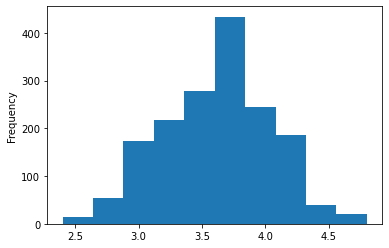

In [105]:
foodieX_ratings['Rating'] = foodieX_ratings['Rating'].astype(float)

foodieX_ratings['Rating'].plot(kind='hist')

In [106]:
print("Median: "+str(foodieX_ratings['Rating'].median())+"\n")

print("Mean: "+str(foodieX_ratings['Rating'].mean())+"\n")

print("Mode: "+str(foodieX_ratings['Rating'].mode())+"\n")

Median: 3.6

Mean: 3.6093037214885975

Mode: 0    3.7
dtype: float64



## Conclusion #1

Seeing the calculation and histogram above, we can determine that the the trending restaurants in Indy are those with a rating between 3.5-3.7. We can trust the large frequency of these ratings as we know that not all the ratings are extremely high or too low - ratings between 3.6-3.7 are above average and we know that the reviews dip heavily when ratings increase (hence we can't be as trusting towards a smaller sample size like the ones given at 4.8).  

## Identifying Cuisines of Trending Restaurants

Knowing the ratings of the popular restuarants in the area, we can find what types of cuisines are associated with them. Note that right now, we are only concerned with the restaurants that have ratings and thus we are going to continue to use the modified data set. In the situation of trending restaurants, we treat the ones with plenty of reviews vs. one with none the same.

In [107]:
#display the quantity of the unique types of cuisines
print(foodieX_ratings['Cuisines'].value_counts())

North Indian                                         121
North Indian, Chinese                                101
Fast Food                                             61
South Indian                                          55
Chinese                                               28
                                                    ... 
Continental, North Indian, Italian, Finger Food        1
North Indian, Seafood, Chinese                         1
Cafe, American, Italian, Burger                        1
North Indian, Chinese, Italian, Continental, Thai      1
Continental, Italian, Fast Food                        1
Name: Cuisines, Length: 654, dtype: int64


Above we see that cuisines such as North Indian and Fast Food are trending amongst all restaurants. Let's see how they look at the most popular restaurants.

In [108]:
foodieX_ratings.loc[foodieX_ratings['Rating']==3.5,'Cuisines'].value_counts()

North Indian                 15
Fast Food                    11
South Indian                  8
North Indian, Chinese         5
Chinese                       3
                             ..
Italian, Beverages            1
Fast Food, Chinese            1
Mangalorean                   1
Chinese, Rolls, Wraps         1
North Indian, Street Food     1
Name: Cuisines, Length: 87, dtype: int64

In [109]:
foodieX_ratings.loc[foodieX_ratings['Rating']==3.6,'Cuisines'].value_counts()

North Indian                          9
North Indian, Chinese                 7
South Indian                          6
Pizza, Fast Food                      3
Mughlai, North Indian                 3
                                     ..
Mughlai                               1
Desserts, Fast Food                   1
Desserts, Beverages                   1
North Indian, Chinese, Fast Food      1
Raw Meats, North Indian, Fast Food    1
Name: Cuisines, Length: 87, dtype: int64

In [110]:
foodieX_ratings.loc[foodieX_ratings['Rating']==3.7,'Cuisines'].value_counts()

North Indian, Chinese                             14
North Indian                                      11
South Indian                                       7
Mithai, Street Food                                4
Pizza, Fast Food                                   4
                                                  ..
Biryani, North Indian, Chinese, Arabian            1
Chinese, North Indian, South Indian, Fast Food     1
Desserts, Street Food                              1
Beverages, Fast Food, Ice Cream                    1
North Indian, Mughlai                              1
Name: Cuisines, Length: 108, dtype: int64

## Conclusion 2

From the Rating range of 3.5-3.7, we can determine that the most popular cuisines are North Indian, South Indian, Chinese, and Fast Food.

## Finding Influence of Cook Times Based on Trending Restaurants

We know that multiple factors go into a rating such as the quality of the food, but the cook time is a significant point of interest, especially for delivery services like FoodieX. Therefore, we will compare the cook times of the trending restaurants vs. those with low and high ratings.

In [111]:
#finds the quantity of the cook time for the restaurants with the inputted rating
def findCookTimes(rating):
    return foodieX_ratings.loc[foodieX_ratings['Rating']==rating,'Cook_Time_Minutes'].value_counts()

print("Cook Time for 3.5 Rating: ")
print(findCookTimes(3.5))
print("")

print("Cook Time for 3.6 Rating: ")
print(findCookTimes(3.6))
print("")

print("Cook Time for 3.7 Rating: ")
print(findCookTimes(3.7))
print("")

Cook Time for 3.5 Rating: 
30    103
45     35
65     11
Name: Cook_Time_Minutes, dtype: int64

Cook Time for 3.6 Rating: 
30    85
45    30
65     9
Name: Cook_Time_Minutes, dtype: int64

Cook Time for 3.7 Rating: 
30     97
45     49
65     20
120     2
20      1
Name: Cook_Time_Minutes, dtype: int64



It is clear that the most popular cook time among the trendy restaurants is 30 minutes. There is a big drop-off between that and the second closest cooking time, 45 minutes. We can now look at the bottom and top range of ratings (by the same interval – 0.3) as the trendy restaurants i.e. 2.4-2.7)

In [112]:
print("Cook Time for 2.4 Rating: ")
print(findCookTimes(2.4))
print("")

print("Cook Time for 2.5 Rating: ")
print(findCookTimes(2.5))
print("")

print("Cook Time for 2.6 Rating: ")
print(findCookTimes(2.6))
print("")

Cook Time for 2.4 Rating: 
30    1
Name: Cook_Time_Minutes, dtype: int64

Cook Time for 2.5 Rating: 
30    2
45    2
65    1
Name: Cook_Time_Minutes, dtype: int64

Cook Time for 2.6 Rating: 
30    5
45    3
65    1
Name: Cook_Time_Minutes, dtype: int64



In [113]:
print("Cook Time for 4.6 Rating: ")
print(findCookTimes(4.6))
print("")

print("Cook Time for 4.7 Rating: ")
print(findCookTimes(4.7))
print("")

print("Cook Time for 4.8 Rating: ")
print(findCookTimes(4.8))
print("")

Cook Time for 4.6 Rating: 
30    7
65    1
45    1
Name: Cook_Time_Minutes, dtype: int64

Cook Time for 4.7 Rating: 
45    6
30    3
65    1
Name: Cook_Time_Minutes, dtype: int64

Cook Time for 4.8 Rating: 
30    1
45    1
Name: Cook_Time_Minutes, dtype: int64



In the bottom and top restaurants in terms of ratings, we see that the percentage of cook times greater than 30 minutes is larger than that of the popular restaurants. We can quickly look at all the restaurants to further analyze this trend.

In [114]:
#sort the ratings in ascending order
foodieX_ratings = foodieX_ratings.sort_values('Rating',ascending=True)

for i in foodieX_ratings['Rating'].unique():
    print(findCookTimes(i))

30    1
Name: Cook_Time_Minutes, dtype: int64
30    2
45    2
65    1
Name: Cook_Time_Minutes, dtype: int64
30    5
45    3
65    1
Name: Cook_Time_Minutes, dtype: int64
30     5
65     4
45     3
120    1
Name: Cook_Time_Minutes, dtype: int64
30     29
45     10
120     2
65      1
Name: Cook_Time_Minutes, dtype: int64
30    25
45    14
65     4
Name: Cook_Time_Minutes, dtype: int64
30    37
45     9
65     5
Name: Cook_Time_Minutes, dtype: int64
30    64
45    12
65     4
Name: Cook_Time_Minutes, dtype: int64
30    68
45    12
65     7
Name: Cook_Time_Minutes, dtype: int64
30    109
45     14
65      8
Name: Cook_Time_Minutes, dtype: int64
30    95
45    25
65    10
Name: Cook_Time_Minutes, dtype: int64
30    103
45     35
65     11
Name: Cook_Time_Minutes, dtype: int64
30    85
45    30
65     9
Name: Cook_Time_Minutes, dtype: int64
30     97
45     49
65     20
120     2
20      1
Name: Cook_Time_Minutes, dtype: int64
30     71
45     56
65     12
120     1
20      1
Name: Cook_Tim

## Conclusion 3

While 30 minutes remains to be the most frequent cook time amongst all the restaurants, we see that there is a greater quantity of longer cook times in restaurants with less ratings. Thus, we can expect to see more delivery orders coming from restaurants that have quicker cook times than those that do not.

## Finding Most Profitable Restaurants

Aside from knowing which restaurants are popular, it's also important to know which one(s) will bring in the greatest profit. Therefore, we will look into the Average_Cost_Dollars column for information. Moreover, we will continue to use the data set that have restaurants with ratings since orders from them are more definite at this point in time.

In [115]:
def findAverageCost(rating):
        return foodieX_ratings.loc[foodieX_ratings['Rating']==rating,'Average_Cost_Dollars'].value_counts()

for i in foodieX_ratings['Rating'].unique():
    print(findAverageCost(i))
    


20.00    1
Name: Average_Cost_Dollars, dtype: int64
15.00    2
20.00    1
35.00    1
25.00    1
Name: Average_Cost_Dollars, dtype: int64
20.00    3
10.00    2
40.00    1
25.00    1
80.00    1
15.00    1
Name: Average_Cost_Dollars, dtype: int64
10.00    5
20.00    3
25.00    3
15.00    2
Name: Average_Cost_Dollars, dtype: int64
15.00    18
20.00    11
10.00     6
25.00     3
40.00     2
5.00      1
30.00     1
Name: Average_Cost_Dollars, dtype: int64
10.00    12
20.00    12
15.00    11
25.00     3
30.00     3
35.00     1
60.00     1
Name: Average_Cost_Dollars, dtype: int64
15.00    18
20.00    16
10.00    11
25.00     3
30.00     2
35.00     1
Name: Average_Cost_Dollars, dtype: int64
15.00    22
20.00    22
10.00    21
25.00     7
5.00      4
50.00     3
35.00     1
Name: Average_Cost_Dollars, dtype: int64
20.00    33
10.00    23
15.00    22
25.00     5
5.00      3
30.00     1
Name: Average_Cost_Dollars, dtype: int64
10.00    46
15.00    37
20.00    34
25.00     7
35.00     3
30.00     

Looking at the data broadly, we see that most average costs span between 10-20 dollars. Moreover, as the rating increases (the list is already sorted in ascending order so the higher ratings are near the bottom), we see there to be a greater amount of cases where the average cost is much higher. But first, let's look at the popular restaurants.

In [116]:
print("Average cost for 3.5 Rating: ")
print(findAverageCost(3.5))
print("")

print("Average cost for 3.6 Rating: ")
print(findAverageCost(3.6))
print("")

print("Average cost for 3.7 Rating: ")
print(findAverageCost(3.7))
print("")

Average cost for 3.5 Rating: 
15.00    48
20.00    44
10.00    35
25.00    13
30.00     5
5.00      3
35.00     1
Name: Average_Cost_Dollars, dtype: int64

Average cost for 3.6 Rating: 
20.00    36
10.00    31
15.00    24
30.00    10
25.00     9
35.00     4
40.00     3
5.00      3
65.00     2
45.00     1
50.00     1
Name: Average_Cost_Dollars, dtype: int64

Average cost for 3.7 Rating: 
20.00    52
15.00    43
10.00    37
25.00    12
30.00    10
35.00     5
5.00      5
40.00     3
60.00     1
55.00     1
Name: Average_Cost_Dollars, dtype: int64



The most trending restaurants share the notion of having an average cost between $10.00-15.00

In [117]:
for i in foodieX_ratings['Rating'].unique():
    if i>=4.0:
        print(findAverageCost(i))

20.00    29
10.00    22
15.00    15
25.00    11
30.00    10
40.00     7
45.00     3
80.00     3
60.00     3
35.00     2
65.00     2
75.00     2
5.00      2
55.00     1
50.00     1
Name: Average_Cost_Dollars, dtype: int64
20.00     17
10.00     14
15.00     13
30.00     10
25.00      9
50.00      6
40.00      5
35.00      3
55.00      2
45.00      2
75.00      1
65.00      1
85.00      1
150.00     1
60.00      1
80.00      1
5.00       1
95.00      1
Name: Average_Cost_Dollars, dtype: int64
60.00    8
20.00    7
30.00    7
40.00    7
25.00    5
15.00    4
35.00    3
50.00    2
80.00    2
10.00    2
75.00    2
90.00    2
55.00    1
5.00     1
Name: Average_Cost_Dollars, dtype: int64
40.00    7
20.00    7
35.00    6
30.00    6
25.00    4
60.00    3
15.00    3
10.00    3
55.00    2
75.00    2
1,00     1
45.00    1
Name: Average_Cost_Dollars, dtype: int64
15.00    4
40.00    3
30.00    3
65.00    2
10.00    2
60.00    2
80.00    2
20.00    2
25.00    2
5.00     2
50.00    2
35.00    1
Name

In the range of ratings 4.0 and above, we see that there is a greater presence of higher average costs. While the most popular rated restaurants have average costs hovering between $10.00-$20.00 most of the time, we see upwards of $25.00 much more frequently in these higher rated restaurants.

## Conclusion 4

While they may not be as popular, we can expect there to be greater profits coming from higher rated restaurants (range 4.0 and up) per order than from trending restaurants. It may be a good idea to try to expand on that more expensive market and shift attention towards it in order to gain greater ground on profits.